In [17]:
 #import necesary libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
#Load the dataset
data = pd.read_excel("data3.xlsx")
data.head()


,AD,R
0,4.370861,18.931501
1,9.556429,90.952654
2,7.587945,57.278351
3,6.387926,40.547402
4,2.404168,5.679564


In [3]:
# Define independent and dependent varaibles
X = data[['AD']]
Y = data['R']
print(f"X shape:{X.shape}, Y shape: {Y.shape}")

X shape:(500, 1), Y shape: (500,)


In [4]:
#splitting the data in train test split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print("Splitting done")

Splitting done


In [8]:
#Create a polynomial feature
poly = PolynomialFeatures(degree=2) #for quadratic
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [9]:
#initialize linear regression model
LR_model = LinearRegression()

#train model 
LR_model.fit(X_train_poly,y_train)

LinearRegression()

In [12]:
#Predicting sales revenue using polynomial features of the test data

y_pred = LR_model.predict(X_test_poly)

In [13]:
#model_evaluation
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 2.5600148008458095e-05
R2 Score: 0.9999999684099331


In [14]:
#Get the intercepts and coefficient
intercept = LR_model.intercept_
slope = LR_model.coef_

print(f"Intercept is:", intercept)
print(f"Slope is:", slope)

Intercept is: -0.0014599659893050898
Slope is: [ 0.         -0.03943041  0.9999599 ]


In [15]:
#Sorting the values for smoother curve plot

X_test_sorted, y_test_sorted, y_pred_sorted = zip(*sorted(zip(X_test['AD'], y_test, y_pred)))

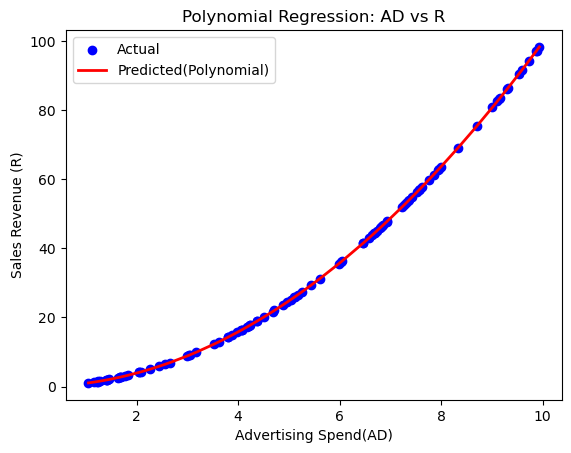

In [16]:
#Plotting the regression curve
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2,label='Predicted(Polynomial)')

#Setting the titles and labels
plt.title('Polynomial Regression: AD vs R')
plt.xlabel('Advertising Spend(AD)')
plt.ylabel('Sales Revenue (R)')

plt.legend()

plt.show()

In [ ]:
#Saving the model
model_filename = 'polynomial_regression_model.joblib'
joblib.dump(model,model_filename)
print(